In [161]:
import pandas as pd
import numpy
import sklearn as sk
import matplotlib.pyplot as plt

# DATA

## Data sets:

In [162]:
filename_confirmed_net='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
filename_deaths_net='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
filename_recovered_net='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [163]:
filename1=r'data/covid_19_data.csv'
filename_deaths=r'data/time_series_covid_19_deaths.csv'
filename_recovered=r'data/time_series_covid_19_recovered.csv'
filename_confirmed=r'data/time_series_covid_19_confirmed.csv'

data_common = pd.read_csv(filename1,index_col=None,sep=',',na_values='?')
data_deaths=pd.read_csv(filename_deaths_net,index_col=None,na_values='?',sep=',')
data_recovered=pd.read_csv(filename_recovered_net,index_col=None,na_values='?',sep=',')
data_confirmed=pd.read_csv(filename_confirmed_net,index_col=None,na_values='?',sep=',')

### Corona-virus default dataset

In [164]:
data_common.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Corona-virus Deaths

In [165]:
data_deaths.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,5,7,8,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Pandas - Functions for filtering

In [166]:
#Filter Data. Return df where column name == vale
def filterByColumnValue(data, columnName, value):
    filtered=data.loc[data[columnName].isin(value)]
    return filtered

#Return df which contains string 'value'
def filterByColumnHas(data, columnName, value):
    filtered=data.loc[data[columnName].str.contains(value)]
    return filtered

In [167]:
#filterByColumnValue(data_deaths,"Country/Region",["Mainland China",'Finland'])

In [168]:
#filterByColumnHas(data_deaths,"Country/Region","Malaysia")

## Functions:

### Map Plot:

In [169]:
import plotly.express as px
import chart_studio.plotly as py
import chart_studio.plotly as py
import plotly.graph_objects as go

In [170]:
import plotly.express as px

## Plot basic map
def plotMapCases(data,title):
    #Delete rows where value on last column is 0
    data=data[data.iloc[:,-1] != 0]
    
    
    #Plot Body
    fig = px.scatter_mapbox(data, lat="Lat", lon="Long",
                            hover_name=data.iloc[:,-1],
                            hover_data=["Country/Region",'Province/State'],
                            zoom=1, height=600,
                            labels={'hover_name':'Cases','hover_data_0':'Cases'},
                            color_discrete_sequence=["red"])#size=data.iloc[:,-1]*0.1
    
    # Configure settings and map layout for body
    fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')   
    fig.update_layout(mapbox_style="carto-darkmatter",title=title)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    #Plot
    fig.show()

# Plot Geo map   
def plotMapGeo(data,title):
    fig = px.scatter_geo(data, lat="Lat", lon="Long",text="Country/Region", 
                         hover_name="Country/Region", 
                         hover_data=['Province/State',data.iloc[:,-1]],
                         height=600)#size=data.iloc[:,-1]*0.1
    
    fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
    
    
    fig.update_layout(mapbox_style="open-street-map",title=title,uniformtext_minsize=200)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

### Bar Plot:

In [171]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

def plotBars(dataSet,startFrom):
    
    #Store Unique Column Values from country/region
    columns_country=dataSet['Country/Region'].unique()
    
    #Make Data set which contains latest death counts by country
    latest_death_count=pd.concat([dataSet['Country/Region'],dataSet.iloc[:,-1]], axis=1)

    graph_death=pd.DataFrame()
    
    #Calculate total death count in each country and append results on the graph_death dataframe
    for i in range (len(columns_country)):
        pickedCountry=filterByColumnValue(latest_death_count,"Country/Region",[columns_country[i]])
        deathsCount=pickedCountry.iloc[:,1:].sum(axis = 0, skipna = True)
        graph_death= graph_death.append(deathsCount,ignore_index=True)

    #add country names to df
    graph_death.insert(0, 'Country', columns_country)
    graph_death.rename(columns={graph_death.columns.values[1]:'Deaths'}, inplace=True)#'2/20/20'
    #graph_death=graph_death.iloc[1:,:]
    
    #Make variable for plotting and insert data
    data = [go.Bar(x=graph_death.iloc[startFrom:,:]['Country'],y=graph_death.iloc[startFrom:,:]['Deaths'])]
    
    
    print(graph_death)  
    return data

def plotBarsSimple(dataSet,startFrom,title):
    
    dataSet=dataSet[dataSet.iloc[:,-1] != 0]
    
    #Store Unique Column Values from country/region
    columns_country=dataSet['Country/Region'].unique()
    
    #Make Data set which contains latest death counts by country
    latest_count=pd.concat([dataSet['Country/Region'],dataSet.iloc[:,-1]], axis=1)

    #Make empy dataframe
    graph_data=pd.DataFrame()
    
    #Calculate total death count in each country and append results on the graph_death dataframe
    for i in range (len(columns_country)):
        pickedCountry=filterByColumnValue(latest_count,"Country/Region",[columns_country[i]])
        caseCount=pickedCountry.iloc[:,1:].sum(axis = 0, skipna = True)
        graph_data = graph_data.append(caseCount,ignore_index=True)

    #add country names to df
    graph_data.insert(0, 'Country', columns_country)
    graph_data.rename(columns={graph_data.columns.values[1]:'Cases'}, inplace=True)
    

    #df = px.data.gapminder() #.query("continent == 'Europe' and year == 2007 and pop > 2.e6")
    fig = px.bar(graph_data.iloc[startFrom:,:], 
          y=graph_data.iloc[startFrom:,:]['Cases'],
          x=graph_data.iloc[startFrom:,:]['Country'],
          text='Cases',height=700)
    
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    
    #X and Y axis label names and sizes
    fig.update_layout(
    xaxis = dict(
        tickangle = 90,
        title_text = "Country",
        title_font = {"size": 15},
        title_standoff = 15),
    yaxis = dict(
        title_text = "Cases",
        title_standoff = 15))
    
    fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide',title=title,)
    graph_data
    plotTable(graph_data)
    fig.show()
    
def plotTable(dataT):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(dataT.columns),
                    fill_color='lavender',
                    align='left'),
        cells=dict(values=[dataT.iloc[:,:-1],dataT.iloc[:,-1:]],
                   fill_color='light blue',
                   align='left'))
    ])

    fig.show()

## Plot Confirmed Cases
-Map<br>
-table<br>
-bar<br>

In [172]:
plotMapCases(data_confirmed,"Corona Virus - Confirmed Cases - Map")
#py.iplot(plotBars(data_confirmed,1), filename='CoronaConfirmed_bar')

In [173]:
plotBarsSimple(data_confirmed,1,"Corona Virus - Confirmed Cases")

## Plot Confirmed Deaths
-Map<br>
-table<br>
-bar<br>

In [477]:
#py.iplot(plotBars(data_deaths,1), filename='CoronaDeaths_bar')
plotMapCases(data_deaths,"Corona Virus - Confirmed Deaths - Map")

In [175]:
plotBarsSimple(data_deaths,0,"Corona Virus - Confirmed Deaths - Bar")

# Data:

## GDP

In [176]:
#Read data set
filename_gdp=r'data/gdp/gdp/GDP_1960_2019.csv'
filename_gdp_capita=r'data/gdp/gdp_capita/GDP_capita_1960_2019.csv'

data_gdp_raw = pd.read_csv(filename_gdp,sep=',',index_col=None)
data_gdp_capita_raw = pd.read_csv(filename_gdp_capita,sep=',',index_col=None)

In [177]:

#Make New column names by editing old column names
#colnames=data_gdp.columns.str.replace('""',"")
#colnames=colnames.str.replace('""',"")


#Remove unnecessary columns & clean column values
#data_gdp=data_gdp.replace(regex=['"'], value='')
def DropColumns(data):
    #print(data.columns)
    data=data.drop(['Indicator Code','Indicator Name','Indicator Name','Country Code'],axis=1)
    return data
#Replace old column names with edited column names
data_gdp=DropColumns(data_gdp_raw)
data_gdp_capita=DropColumns(data_gdp_capita_raw)


## Function - Filter GDP data

In [178]:
import numpy as np

def PrepareGDPData(data, exampleData):
    #Choose columns
    data_gdp_filtered=data[['Country Name','2017']]
    
    #column 2018 to numeric format
   # data_gdp_filtered['2018']=pd.to_numeric(data_gdp_filtered['2018'])
    
    #Get unique names of countries in corona data
    columns_country=exampleData['Country/Region'].unique()
    columns_country_gdp=data_gdp['Country Name'].unique()

    #Rename Mainland China, US, Uk
    #columns_country[0]="China"
    columns_country[np.where(columns_country == 'Mainland China')]="China"
    columns_country[np.where(columns_country == 'UK')]="United Kingdom"
    columns_country[np.where(columns_country == 'US')]="United States"
    columns_country[np.where(columns_country == ' Azerbaijan')]="Azerbaijan"
    #exampleData.columns=columns_country
    #Remove Others
    columns_country=np.delete(columns_country,np.where(columns_country == 'Others'))


    #Rename values in gdp list
    data_gdp_filtered=data_gdp_filtered.replace(regex=['Korea, Rep.'], value='South Korea')
    data_gdp_filtered=data_gdp_filtered.replace(regex=['Hong Kong SAR, China'], value='Hong Kong')
    data_gdp_filtered=data_gdp_filtered.replace(regex=['Russian Federation'], value='Russia')
    data_gdp_filtered=data_gdp_filtered.replace(regex=['Egypt, Arab Rep.'], value='Egypt')
    data_gdp_filtered=data_gdp_filtered.replace(regex=['Iran, Islamic Rep.'], value='Iran')
    data_gdp_filtered=data_gdp_filtered.replace(regex=['Macao SAR, China'], value='Macau')

    #Filter all un wanted countries from the gdp dataframe base on countries included in corona virus data
    data_gdp_filtered=filterByColumnValue(data_gdp_filtered,"Country Name",columns_country)
    
    print('GDP length: ',len(data_gdp_filtered),"\tExampleData length: ",len(columns_country))
    #Check if values missing from list
    for i in range(len(columns_country)):
        if columns_country[i] not in data_gdp_filtered['Country Name'].values:
            
            print(columns_country[i],'\t index: ',i)
    
    return data_gdp_filtered




### Prepare GDP data

In [478]:
#Prepared data
data_gdp_filtered = PrepareGDPData(data_gdp,data_deaths).reset_index(drop=True)
data_gdp_capita_filtered=PrepareGDPData(data_gdp_capita,data_deaths).reset_index(drop=True)

data_gdp_filtered.rename(columns={'2017': 'GDP'}, inplace=True)
data_gdp_capita_filtered.rename(columns={'2017': 'GDP/Capita'}, inplace=True)

GDP length:  93 	ExampleData length:  98
Taiwan 	 index:  4
Saint Barthelemy 	 index:  78
Palestine 	 index:  85
Slovakia 	 index:  95
Vatican City 	 index:  97
GDP length:  93 	ExampleData length:  98
Taiwan 	 index:  4
Saint Barthelemy 	 index:  78
Palestine 	 index:  85
Slovakia 	 index:  95
Vatican City 	 index:  97


In [180]:
#print(data_gdp['Country Name'].unique())

In [181]:
#data_gdp_capita_filtered

In [182]:
#data_gdp_filtered


## Temperature:
-data set is from <a>https://tradingeconomics.com/country-list/temperature</a>

In [480]:
# Read Data
filename_temperature_avg_2015=r'data/weather/temperatureData2015.csv'

data_temperature_raw = pd.read_csv(filename_temperature_avg_2015,sep='\t',index_col=None)
#print(data_temperature_raw[47:])
#print(data_gdp_filtered['Country Name'].values)

#rename
data_temperature_raw=data_temperature_raw.replace(regex=['Macedonia'], value='North Macedonia')

In [481]:
data_temperature_filtered=filterByColumnValue(data_temperature_raw,"Country",data_gdp_filtered['Country Name'].unique()).reset_index(drop=True)
j=0

columns_country=data_gdp_filtered['Country Name'].unique()
for i in range(len(columns_country)):
    if columns_country[i] not in data_temperature_filtered['Country'].values:
        print(columns_country[i],'\t index: ',i)

Gibraltar 	 index:  35


In [482]:
data_temperature_filtered.head(2)

,Country,Last,Date,Previous,Max,Min,Scale
0,Afghanistan,2.88,Dec/15,7.73,28.53,-4.55,celsius
1,Algeria,13.35,Dec/15,18.21,35.83,9.53,celsius


In [483]:
data_temperature_filtered=data_temperature_filtered[['Country','Last','Previous','Min','Max']]
data_temperature_filtered.rename(columns={'Last':'Last Temperature',
                                 'Previous':'Previous Temperature',
                                 'Min':'Min temperature',
                                 'Max':'Max Temperature'},inplace=True)

## General data:
-dataset is from kaggle
<a>https://www.kaggle.com/sudalairajkumar/undata-country-profiles#country_profile_variables.csv</a>

In [484]:
# Read Data
filename_general_country_raw=r'data/general data/kaggle_country_profile_variables_2017_massive.csv'

data_general_country = pd.read_csv(filename_general_country_raw,sep=',',index_col=None)
#print(data_gdp_filtered['Country Name'].values)
#data_temperature_raw=data_temperature_raw.replace(regex=['Macedonia'], value='North Macedonia')



In [485]:
data_general_country.head(2)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99


In [486]:
#Rename columns
data_general_country['country'].replace({
    'China': 'China',
    'Russian Federation': 'Russia', 
    'China, Hong Kong SAR': 'Hong Kong', 
    'Republic of Korea': 'South Korea', 
    'Iran (Islamic Republic of)': 'Iran',
    'The former Yugoslav Republic of Macedonia' : 'North Macedonia',
    'Czechia' : 'Czech Republic',
    'China, Macao SAR' : 'Macau',
    'United States of America':'United States',
    'Viet Nam' : 'Vietnam'},inplace=True)

#Choose countries that can be found from temperature data
data_general_filtered=filterByColumnValue(data_general_country,"country",data_temperature_filtered['Country'].unique()).reset_index(drop=True)

#Filter unwanted columns from the dataframe
data_general_filtered=data_general_filtered[
    ['country','Population density (per km2, 2017)',
     'GDP per capita (current US$)',
    'Unemployment (% of labour force)',
    'Population age distribution (0-14 / 60+ years, %)',
    'Urban population (% of total population)',
     'Life expectancy at birth (females/males, years)',
     'Refugees and others of concern to UNHCR (in thousands)',
     'Health: Physicians (per 1000 pop.)',
     'Health: Total expenditure (% of GDP)']]



columns_country=data_temperature_filtered['Country'].unique()
for i in range(len(columns_country)):
    if columns_country[i] not in data_general_filtered['country'].values:
        print(columns_country[i],'\t index: ',i)

In [487]:
data_general_filtered.head(2)


,country,"Population density (per km2, 2017)",GDP per capita (current US$),Unemployment (% of labour force),"Population age distribution (0-14 / 60+ years, %)",Urban population (% of total population),"Life expectancy at birth (females/males, years)",Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP)
0,Afghanistan,54.4,623.2,8.6,43.2/4.1,26.7,63.5/61.0,1513.1,0.3,8.2
1,Algeria,17.3,4154.1,11.4,29.3/9.4,70.7,76.5/74.1,99.8,...,7.2


## Smoking Happiness, Crime Rate, Tourism, Temperature(Avg), Tuberculosis, Obesity, Suicide
-datasets are from <a href="http://worldpopulationreview.com/countries/">worldpopulationreview.com</a><br>
-excpect tuberculosis data set is from <a href="https://data.worldbank.org/indicator/SH.TBS.INCD">from data.worldbank.org</a> 

In [538]:
# needed for missing values function
X = pd.read_csv('corona_bigdata.csv',index_col=None,sep=',',na_values='?')

#Check missing values
def MissingValues(data,country_column):
    print('Missing values from data:\n')
    for i in range(len(X['Country'].values)):
        if X['Country'].values[i] not in data[country_column].values:

            print(X['Country'].values[i],'\t index: ',i)

In [510]:
# Read smoking Data 1
smoking=r'data/health/smoking_data_worldpopulationreview_com.csv'

smoking_data = pd.read_csv(smoking,sep=',',index_col=None)
smoking_filtered=filterByColumnValue(smoking_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read happiness Data 2
happiness=r'data/happiness/Happiness By Country 2020 - worldpopulationreview.csv'

happiness_data = pd.read_csv(happiness,sep=',',index_col=None)
happiness_filtered=filterByColumnValue(happiness_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read crime rate by country Data 3
crimerate=r'data/crime/Crime Rate By Country 2020 - worldpopulationreview.csv'

crimerate_data = pd.read_csv(crimerate,sep=',',index_col=None)
crimerate_filtered=filterByColumnValue(crimerate_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read most visited countries Data 4
tourism=r'data/tourism/Most Visited Countries 2020 - worldpopultaionreview.csv'

tourism_data = pd.read_csv(tourism,sep=',',index_col=None)
tourism_filtered=filterByColumnValue(tourism_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read average temperature Data 5
tempAVG=r'data/weather/Hottest Countries In The World - worldpopulationreview.csv'

tempAVG_data = pd.read_csv(tempAVG,sep=',',index_col=None)
tempAVG_filtered=filterByColumnValue(tempAVG_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read tuberculosis Data 6
tuberculosis=r'data/health/tuberculosis_2018_worldbank.csv'

tuberculosis_data = pd.read_csv(tuberculosis,sep=',',index_col=None)
tuberculosis_filtered=filterByColumnValue(tuberculosis_data,"Country Name",X['Country'].unique()).reset_index(drop=True)

#Read Obesity Data 7
obesity=r'data/health/Obesity_worldpopulationreview.csv'

obesity_data = pd.read_csv(obesity,sep=',',index_col=None)
obesity_filtered=filterByColumnValue(obesity_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read Obesity Data 8
deathrate=r'data/health/Death Rate By Country 2020 - worldpopulationreview.csv'

deathrate_data = pd.read_csv(deathrate,sep=',',index_col=None)
deathrate_filtered=filterByColumnValue(deathrate_data,"name",X['Country'].unique()).reset_index(drop=True)

#Read Obesity Data 9
suicide=r'data/health/Suicide Rate By Country 2020 - worldpopulationreview.csv'

suicide_data = pd.read_csv(suicide,sep=',',index_col=None)
suicide_filtered=filterByColumnValue(suicide_data,"name",X['Country'].unique()).reset_index(drop=True)

### Smoking

In [520]:
smoking_x=smoking_filtered.iloc[:,:-1]
smoking_x=filterByColumnValue(smoking_x,"name",X['Country'].unique()).reset_index(drop=True)

        
MissingValues(smoking_x,'name')
smoking_x.head(2)

#Still has missing values in data set

Missing values from data:



,name,totalSmokingRate,maleSmokingRate,femaleSmokingRate
0,Ecuador,8.65,14.0,3.3
1,Nigeria,9.25,17.4,1.1


### Happiness

In [512]:
happiness_x=happiness_filtered
happiness_x=filterByColumnValue(happiness_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(happiness_x,'name')
happiness_x.head(2)

Missing values from data:

Andorra 	 index:  2
Faroe Islands 	 index:  28
Liechtenstein 	 index:  49
Macau 	 index:  52
Monaco 	 index:  55
North Macedonia 	 index:  61
Oman 	 index:  63
San Marino 	 index:  72


,name,happinessRank,happinessScore,pop2019
0,Finland,1,7.769,5532.156
1,Denmark,2,7.600,5771.876


### crime rate

In [539]:
crimerate_x=crimerate_filtered
crimerate_x=filterByColumnValue(crimerate_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(crimerate_x,'name')
crimerate_x.head(2)

Missing values from data:

Andorra 	 index:  2
Bhutan 	 index:  11
Cameroon 	 index:  15
Faroe Islands 	 index:  28
Liechtenstein 	 index:  49
Macau 	 index:  52
Monaco 	 index:  55
North Macedonia 	 index:  61
San Marino 	 index:  72
Senegal 	 index:  74
Togo 	 index:  85


,name,crimeIndex,pop2019
0,South Africa,77.02,58558.270
1,Afghanistan,73.26,38041.754


### Tourism

In [514]:
tourism_x=tourism_filtered
tourism_x=filterByColumnValue(tourism_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(tourism_x,'name')
tourism_x.head(2)

Missing values from data:



,name,touristArrivals,tourismReceipts,pop2019
0,San Marino,60000,0.0,33.860
1,Kuwait,203000,599000000.0,4207.083


### Temperature AVG

In [515]:
tempAVG_x=tempAVG_filtered
tempAVG_x=filterByColumnValue(tempAVG_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(tempAVG_x,'name')
tempAVG_x.head(2)

##Kaikkien maiden väkiluku löytyy

Missing values from data:



,name,averageTemperature,averageTemperatureF,pop2019
0,Canada,-5.35,22.37,37411.047
1,Russia,-5.10,22.82,145872.256


### Tuberculosis

In [516]:
tuberculosis_x=tuberculosis_filtered
tuberculosis_x=filterByColumnValue(tuberculosis_x,"Country Name",X['Country'].unique()).reset_index(drop=True)


MissingValues(tuberculosis_x,'Country Name')
tuberculosis_x.head(2)

Missing values from data:



,Series Name,Series Code,Country Name,Country Code,tuberculosis(per/100k) 2018
0,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,Afghanistan,AFG,189
1,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,Algeria,DZA,69


### Obesity

In [517]:
obesity_x=obesity_filtered
obesity_x=filterByColumnValue(obesity_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(obesity_x,'name')
obesity_x.head(2)

Missing values from data:



,name,obesityRate,bmi,pop2019
0,Kuwait,0.379,30,4207.083
1,United States,0.362,28.8,329064.917


### Death rate

In [518]:
deathrate_x=deathrate_filtered
deathrate_x=filterByColumnValue(deathrate_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(deathrate_x,'name')
deathrate_x.head(2)

Missing values from data:



,name,pop2019,Rate(per/100)
0,Ukraine,43993.638,15.192
1,Latvia,1906.743,14.669


## Suicide rate

In [519]:
suicide_x=suicide_filtered
suicide_x=filterByColumnValue(suicide_x,"name",X['Country'].unique()).reset_index(drop=True)


MissingValues(suicide_x,'name')
suicide_x.head(2)

#Still has missing values in data set

Missing values from data:



,cca2,name,suicideRank,total,male,female,totalNumber
0,LT,Lithuania,1.0,31.9,58.1,9.5,894.0
1,RU,Russia,2.0,31.0,55.9,9.4,45178.0


# Make Combined Data Set

In [277]:
#Function for initialazising Corona Virus original Data
def Prepare_TSet(dataSet, filter_value,info):    
    dataSet=dataSet[data_deaths.iloc[:,-1] >= filter_value]

    #Store Unique Column Values from country/region
    columns_country=dataSet['Country/Region'].unique()
    #print(columns_country)

    #Make Data set which contains latest death counts by country
    latest_count=pd.concat([dataSet['Country/Region'],dataSet.iloc[:,-1]], axis=1)

    #Make empy dataframe
    X=pd.DataFrame()

    #Calculate total death count in each country and append results on the graph_death dataframe
    for i in range (len(columns_country)):
        pickedCountry=filterByColumnValue(latest_count,"Country/Region",[columns_country[i]])
        caseCount=pickedCountry.iloc[:,1:].sum(axis = 0, skipna = True)
        X = X.append(caseCount,ignore_index=True)

    #add country names to df
    X.insert(0, 'Country', columns_country)
    X.rename(columns={X.columns.values[1]:info}, inplace=True)
    
    #Rename cells from column Country
    X['Country'].replace({'Mainland China': 'China', 'UK': 'United Kingdom', 'US': 'United States', ' Azerbaijan': 'Azerbaijan'},inplace=True)
    
    return X

### Initialize Dataframes for combining
-Name main labels(Deaths,Confirmed,Recovered)<br>
-Sort alphabetically<br>
-Filter countries which for we don't have data

In [192]:
#Initialize dataFrames
data_x1=Prepare_TSet(data_deaths,0,"Deaths")
data_x2=Prepare_TSet(data_confirmed,0,"Confirmed")
data_x3=Prepare_TSet(data_recovered,0,"Recovered")

#Sort data
data_x1.sort_values(by=['Country'],inplace=True)
data_x2.sort_values(by=['Country'],inplace=True)
data_x3.sort_values(by=['Country'],inplace=True)

df_general=data_general_filtered.sort_values(by=['country'])
df_temperature=data_temperature_filtered.sort_values(by=['Country'])

In [193]:
#Remove Countries which for we don't have data
data_x1=filterByColumnValue(data_x1,"Country",data_general_filtered['country'].unique()).reset_index(drop=True)
data_x2=filterByColumnValue(data_x2,"Country",data_general_filtered['country'].unique()).reset_index(drop=True)
data_x3=filterByColumnValue(data_x3,"Country",data_general_filtered['country'].unique()).reset_index(drop=True)


### Split Cells with double values

General data had two columns which had two informative values(separator: /):<br>
-Population age distribution (0-14 / 60+ years, %)<br>
-Life expectancy at birth (females/males, years)<br>

In [194]:

#Split ageDistribution column
age_distribution=df_general["Population age distribution (0-14 / 60+ years, %)"].str.split("/", n=1, expand=True)
age_distribution.columns=['Age 0-14(%)','Age 60+(%)']
#drop originaL column
df_general=data_general_filtered.drop(["Population age distribution (0-14 / 60+ years, %)"],axis=1,inplace=True)

#Split ageDistribution column
life_expectancy=data_general_filtered["Life expectancy at birth (females/males, years)"].str.split("/", n=1, expand=True)
life_expectancy.columns=['Life expectancy(W)','Life expectancy(M)']
#Drop original column
df_general=data_general_filtered.drop(['Life expectancy at birth (females/males, years)'],axis=1,inplace=True)

In [278]:
X

,Country,Deaths,Confirmed,Recovered,"Population density (per km2, 2017)",GDP per capita (current US$),Unemployment (% of labour force),Urban population (% of total population),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Life expectancy(W),Life expectancy(M),Age 0-14(%),Age 60+(%),Last Temperature,Previous Temperature,Min temperature,Max Temperature
0,Afghanistan,0.0,1.0,0.0,54.4,623.2,8.6,26.7,1513.1,0.3,8.2,63.5,61.0,43.2,4.1,2.88,7.73,-4.55,28.53
1,Algeria,0.0,17.0,0.0,17.3,4154.1,11.4,70.7,99.8,NaN,7.2,76.5,74.1,29.3,9.4,13.35,18.21,9.53,35.83
2,Andorra,0.0,1.0,0.0,163.8,39896.4,-99,85.1,-99,3.7,8.1,-99,None,14.4,19.0,7.08,9.76,-0.92,24.31
3,Argentina,0.0,2.0,0.0,16.2,14564.5,6.5,91.8,5.0,3.8,4.8,79.8,72.2,24.9,15.4,20.31,17.27,4.80,23.29
4,Armenia,0.0,1.0,0.0,102.9,3489.1,16.6,62.7,19.3,2.8,4.5,77.0,70.6,20.0,16.9,-4.14,2.94,-10.28,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Ukraine,0.0,1.0,0.0,76.3,2021.6,8.8,69.7,1644.8,3.0,7.1,76.0,66.1,15.5,23.2,1.52,5.15,-14.72,24.30
88,United Arab Emirates,0.0,29.0,5.0,112.4,40438.8,3.7,85.5,1.3,1.6,3.6,78.2,76.0,13.9,2.4,20.76,24.98,15.74,37.75
89,United Kingdom,2.0,163.0,8.0,273.6,44162.4,5.0,82.6,151.7,2.8,9.1,82.8,79.0,17.7,23.9,6.92,8.21,-1.47,17.29
90,United States,14.0,278.0,8.0,35.5,56053.8,4.9,81.6,616.5,2.6,17.1,81.2,76.5,18.9,21.5,-1.42,2.45,-7.58,23.01


In [279]:
df_general=data_general_filtered.iloc[:,1:]

### Combine all dataframes into one
-using pandas concat<br>
-drop duplicate country columns with iloc

In [491]:
X = pd.concat([
    
    data_x1,
    data_x2.iloc[:,1:],
    data_x3.iloc[:,1:],
    df_general,
    life_expectancy,
    age_distribution,
    df_temperature.iloc[:,1:]
    
    ],sort =False, axis=1)

X.replace(to_replace = '...', value ='NaN',inplace=True)
X.replace(to_replace = '~0.0', value =0,inplace=True)#~0.0

### Save dataset to CSV

In [492]:
#Save dataset to csv
X.to_csv('corona_bigdata.csv',index=False)

In [493]:
#XX.describe(include='all',percentiles=[0.15])
#XX.quantile(0.15)

# Model 1 - Confirmed cases

## Open dataset

In [385]:
XX = pd.read_csv('corona_bigdata.csv',index_col=None,sep=',',na_values='?')
#

#Choose all but China
XX=XX[XX['Country'] != 'China']

#Take country names for linear regression model
country_names=XX['Country'].values

#Values to numeric format
XX = XX.iloc[:,1:].astype(float)
XX.shape

XX[XX == -99] = np.nan

#fill na with percentile 0.15
XX.fillna(XX.quantile(0.15), inplace=True)#method='ffill' #tourism_x.describe(percentiles=[0.20]).get('touristArrivals')[4]

### Plot Correlation:

In [386]:
from yellowbrick.features import Rank2D

#Correlation function
def pearsonCor(data):
    visualizer = Rank2D(algorithm="pearson",size=(1080*1.3, 720*1.3))
    visualizer.fit_transform(data)# or df_scaled
    #visualizer.show(outpath=str(i)+"data_pearson.png")
    

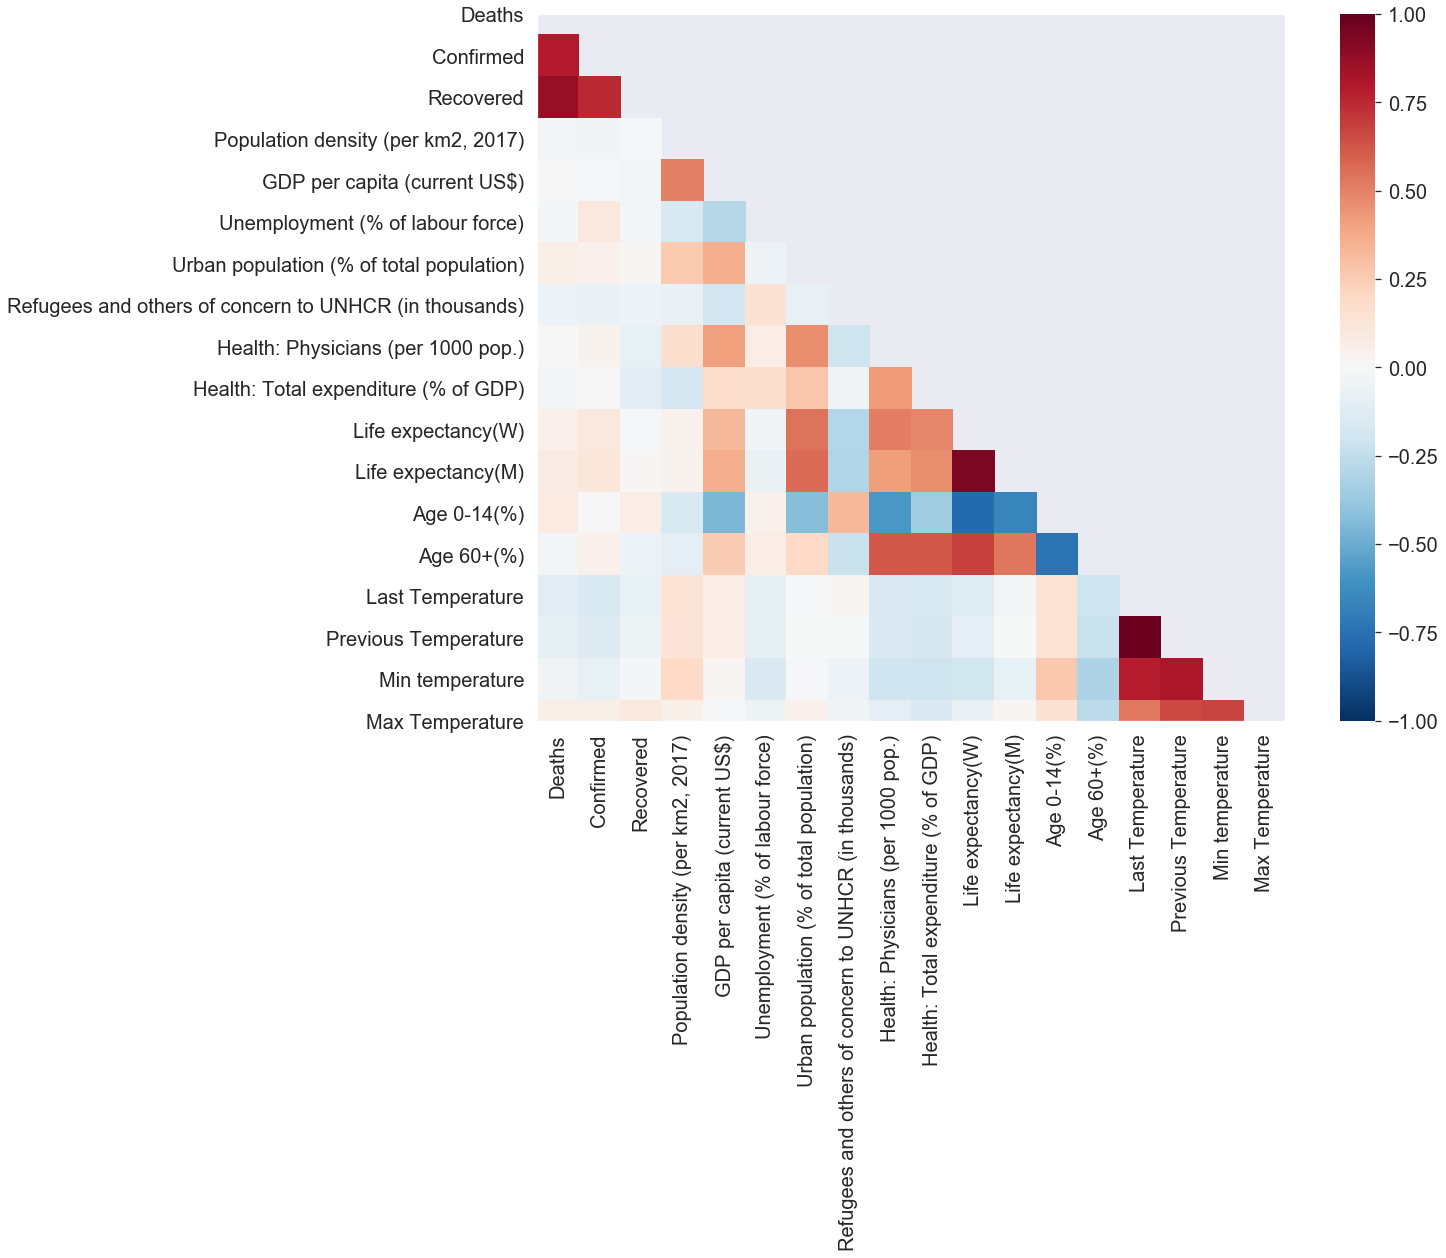

In [540]:
pearsonCor(XX.iloc[:,:])

## Prepare Data:
-standardize<br>
-split in X Y<br>
-save mean and std

In [529]:
def StandardizeAndColumns(data):
    colnamesX = data.iloc[:,3:].columns.get_values()

    meanV=data['Confirmed'].mean()
    stdV=data['Confirmed'].std()

    scaled_values=(data.iloc[:,1:]-meanV)/stdV
    
    return scaled_values,colnamesX,meanV,stdV

    #from sklearn.preprocessing import StandardScaler
    #scaler = StandardScaler()
    #scaled_values=pd.DataFrame(scaler.fit_transform(XX.iloc[:,1:].values))

    #X and Y
scaled_values,colnamesX,meanV,stdV =StandardizeAndColumns(XX)
X_train = scaled_values.iloc[:,2:].values
Y_train= scaled_values.iloc[:,0].values
print('Scaled shape: ',scaled_values.shape)
print('X shape: ',X_train.shape)
print('Y shape: ',Y_train.shape)

Scaled shape:  (91, 17)
X shape:  (91, 15)
Y shape:  (91,)


C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.



In [521]:
XX.head(2)

,Deaths,Confirmed,Recovered,"Population density (per km2, 2017)",GDP per capita (current US$),Unemployment (% of labour force),Urban population (% of total population),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Life expectancy(W),Life expectancy(M),Age 0-14(%),Age 60+(%),Last Temperature,Previous Temperature,Min temperature,Max Temperature
0,0.0,1.0,0.0,54.4,623.2,8.6,26.7,1513.1,0.30,8.2,63.5,61.0,43.2,4.1,2.88,7.73,-4.55,28.53
1,0.0,17.0,0.0,17.3,4154.1,11.4,70.7,99.8,1.14,7.2,76.5,74.1,29.3,9.4,13.35,18.21,9.53,35.83


In [522]:
scaled_values.head(2)

,Confirmed,Recovered,"Population density (per km2, 2017)",GDP per capita (current US$),Unemployment (% of labour force),Urban population (% of total population),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Life expectancy(W),Life expectancy(M),Age 0-14(%),Age 60+(%),Last Temperature,Previous Temperature,Min temperature,Max Temperature
0,-0.231228,-0.232261,-0.176075,0.411397,-0.223379,-0.204685,1.330509,-0.231951,-0.223792,-0.166677,-0.169259,-0.187643,-0.228027,-0.229287,-0.224277,-0.236961,-0.202795
1,-0.214703,-0.232261,-0.214393,4.058205,-0.220487,-0.159240,-0.129185,-0.231084,-0.224825,-0.153250,-0.155729,-0.201999,-0.222553,-0.218473,-0.213453,-0.222418,-0.195255


## Create Linear Regression - confirmed cases

In [393]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def LinearReg(x,y):
    global meanV
    global stdV
    
    # build and fit model
    clf = LinearRegression()
    clf.fit(x,y)

    # output model
    print("Coefficients:" ,clf.coef_)
    print("Intercept:", clf.intercept_)

    # compute predicted values
    pred = clf.predict(x)

    # compute error statistics
    mse = mean_squared_error(y, pred)
    r2s = r2_score(y, pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    
    pred_invrs=pred*stdV+meanV
  #  df_result=pd.DataFrame(pred_invrs.reshape(1,int(y.shape[0])))
   # df_result.columns=country_names.reshape(int(y.shape[0]).values,1)
   # print(df_result)
    #Cross validation
    #dfPred=pd.DataFrame(pred*stdW+meanW)
    #dfPred.to_excel(r'PredictionResult.xlsx')
    #print(dfPred)
    return clf.coef_

In [394]:
coef = LinearReg(X_train,Y_train)
coef = pd.DataFrame(coef.reshape(1,15))
coef.columns=colnamesX

Coefficients: [ 6.31565169e-03  2.13409914e-03  2.38412533e+01  2.09513160e+00
 -5.64862614e-02 -4.25037652e+01 -7.81667997e+01 -5.72464168e+00
  4.29843856e+01  4.14008865e+01  3.51564471e+01  5.87429376e+00
 -3.42299135e+01 -4.77680648e+00  4.53559148e+01]
Intercept: 2.534341180762113
MSE =  0.8687702986883259
R2s =  0.12157669799291493


### Plot Coefficients:

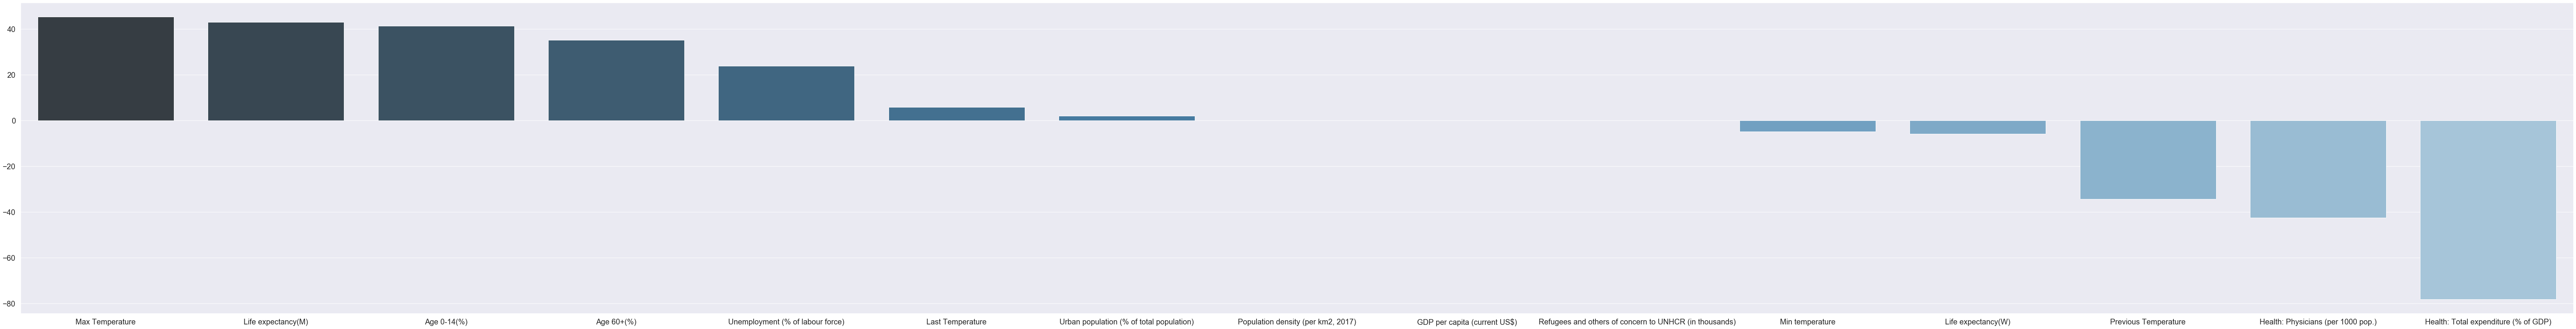

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 20, 'ytick.labelsize': 20}
sns.set(rc=rc)
#coef.columns=colnames

coef = coef
coef=coef.sort_values(by=0, ascending=False, axis=1)
plt.figure(figsize=(120, 15))


ax = sns.barplot(data=coef,palette="Blues_d")
plt.savefig("plots/Corona_confirmed.png")

# Model 2 - Death percentage

## Open data

In [401]:
XX2 = pd.read_csv('corona_bigdata.csv',index_col=None,sep=',',na_values='?')
#

#Choose all but China
#XX=XX[XX['Country'] != 'China']

#Filter all countries with less than 1 death
XX2=XX2[XX2['Deaths'] >= 1]

#Take country names for linear regression model
country_names=XX2['Country']

#Values to numeric format
#XX2 = XX2.iloc[:,1:].astype(float)
XX2.shape

#Fill NA values 
XX2[XX2 == -99] = np.nan
XX2.fillna(XX2.quantile(0.30), inplace=True)#method='ffill'

#Transform deaths in death percentage
XX2['Deaths']=XX2['Deaths']/XX2['Confirmed']*100

In [533]:
XX2.head(10)

,Country,Deaths,Confirmed,Recovered,"Population density (per km2, 2017)",GDP per capita (current US$),Unemployment (% of labour force),Urban population (% of total population),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Health: Total expenditure (% of GDP),Life expectancy(W),Life expectancy(M),Age 0-14(%),Age 60+(%),Last Temperature,Previous Temperature,Min temperature,Max Temperature
5,Australia,3.333333,60.0,21.0,3.2,51352.20,5.5,89.4,58.20,3.40,9.40,84.4,80.2,19.0,21.0,28.06,26.95,12.53,29.86
18,China,3.775458,80573.0,53888.0,7014.2,42431.00,3.5,100.0,2.50,2.72,6.42,86.4,80.5,11.5,23.5,-5.24,0.67,-11.73,21.04
30,France,1.378254,653.0,12.0,35.3,9085.15,4.0,42.0,31.88,2.72,6.42,84.5,78.3,21.0,22.5,7.70,9.65,1.60,23.66
34,Hong Kong,1.869159,107.0,46.0,235.6,41686.20,4.2,75.3,1052.10,4.10,11.30,82.9,77.9,13.1,28.0,28.52,28.39,11.62,29.68
39,Iran,2.612176,4747.0,913.0,145.7,3346.50,5.8,53.7,13.80,0.20,2.80,70.7,66.6,27.4,8.6,6.54,11.87,-0.02,31.65
40,Iraq,7.500000,40.0,0.0,49.8,5038.10,11.3,73.4,978.30,1.50,7.50,76.2,74.0,23.7,8.8,8.92,16.21,3.84,37.40
43,Italy,4.249353,4636.0,523.0,384.5,37129.40,5.9,92.1,44.70,3.60,7.80,83.7,80.0,27.9,16.1,6.69,9.90,-1.22,26.12
44,Japan,1.428571,420.0,46.0,201.8,30462.40,11.4,69.0,216.70,3.90,9.20,84.7,79.9,13.5,29.4,4.06,9.28,-2.26,26.64
58,Netherlands,0.781250,128.0,0.0,505.2,44332.10,5.6,90.5,116.30,3.40,10.90,83.1,79.4,16.4,25.0,21.19,21.37,2.68,23.44
66,Philippines,20.000000,5.0,1.0,124.6,12355.50,5.3,60.5,23.70,2.30,6.40,81.0,72.9,14.8,24.0,25.79,26.25,22.98,29.16


In [402]:
country_names

5          Australia
18             China
30            France
34         Hong Kong
39              Iran
40              Iraq
43             Italy
44             Japan
58       Netherlands
66       Philippines
72        San Marino
79       South Korea
80             Spain
83       Switzerland
84          Thailand
89    United Kingdom
90     United States
Name: Country, dtype: object

### Plot correlation

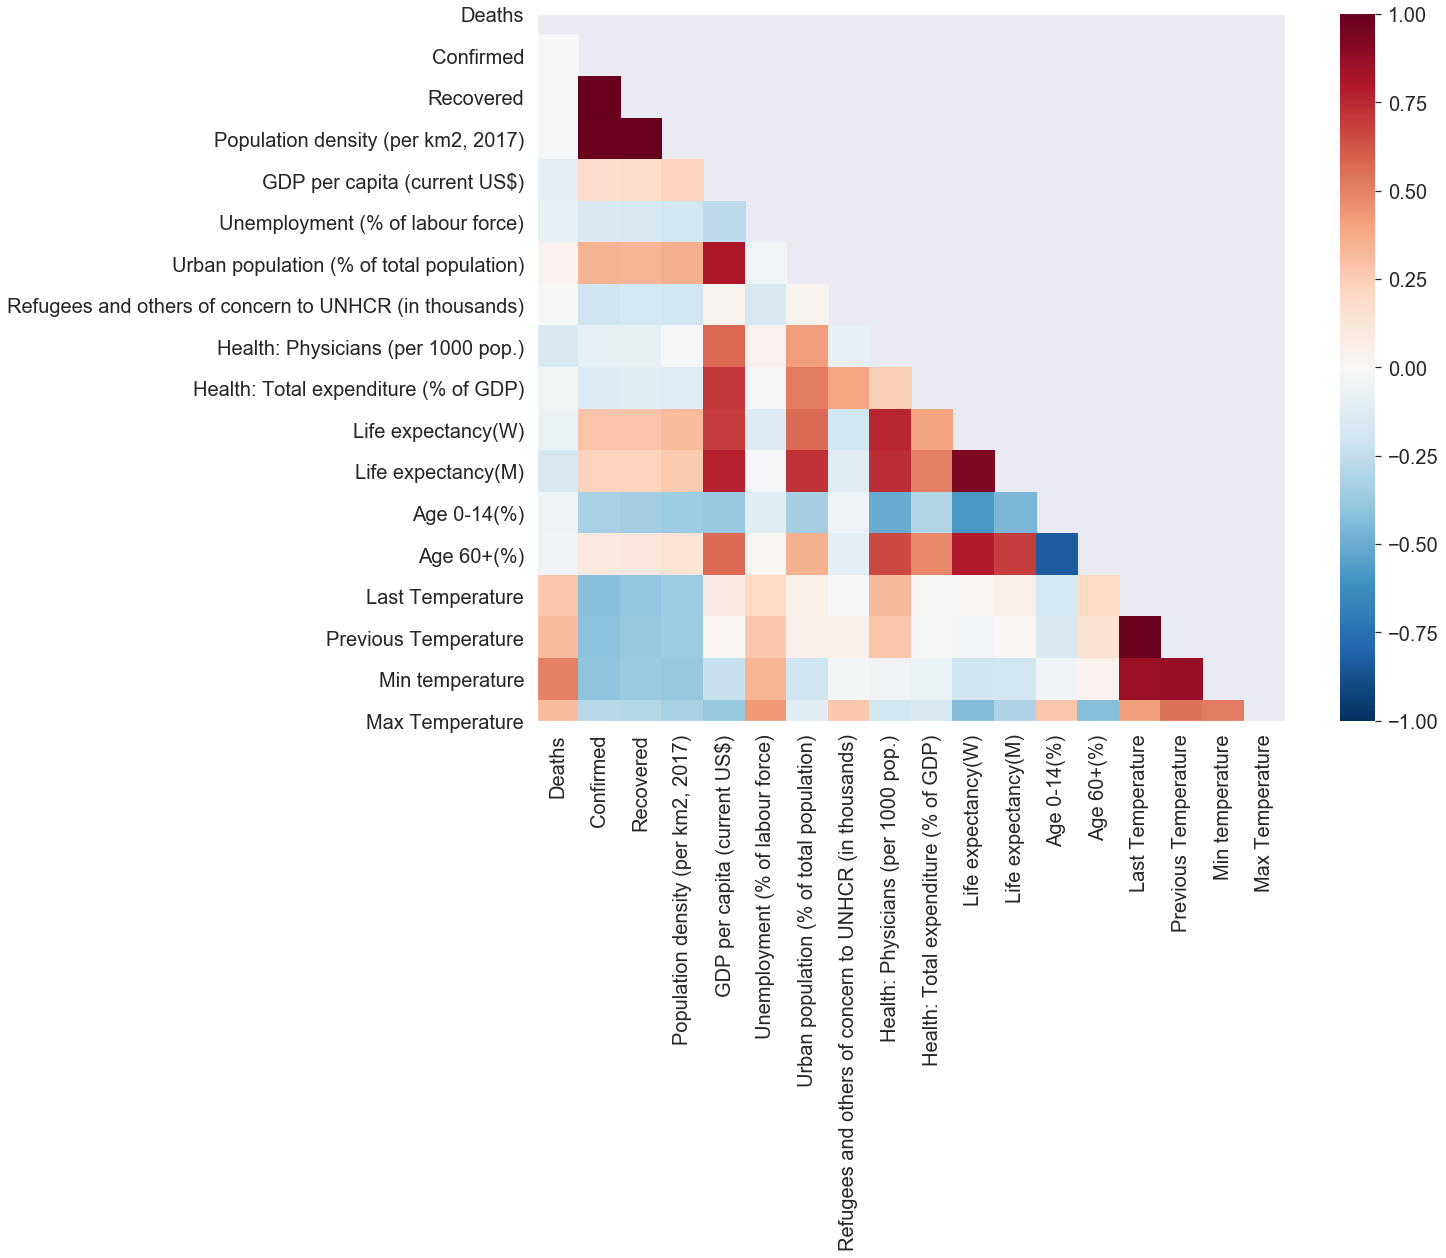

In [535]:
pearsonCor(XX2.iloc[:,1:])

## Prepare Data
-split

In [403]:
#train values
XX2_data=XX2.iloc[:,4:]
column_names=XX2.iloc[:,4:].columns.values
#Label values
XX2_labels=XX2['Deaths']

In [404]:
coef = LinearReg(XX2_data,XX2_labels)
coef = pd.DataFrame(coef.reshape(1,15))
coef.columns=colnamesX

Coefficients: [-3.43684247e-04 -2.31093702e-04 -9.77252253e-01  1.58058756e-01
 -1.11025631e-02  5.56015840e+00  1.41848300e+00 -7.16267051e-01
 -1.13821787e-02 -9.49936305e-01 -9.45882097e-01 -2.12950470e+00
  1.60630707e+00  1.25707585e+00 -2.20119168e-01]
Intercept: 82.48747775475469
MSE =  0.6138345489018434
R2s =  0.9694553755090626


### Plot Coefficients:

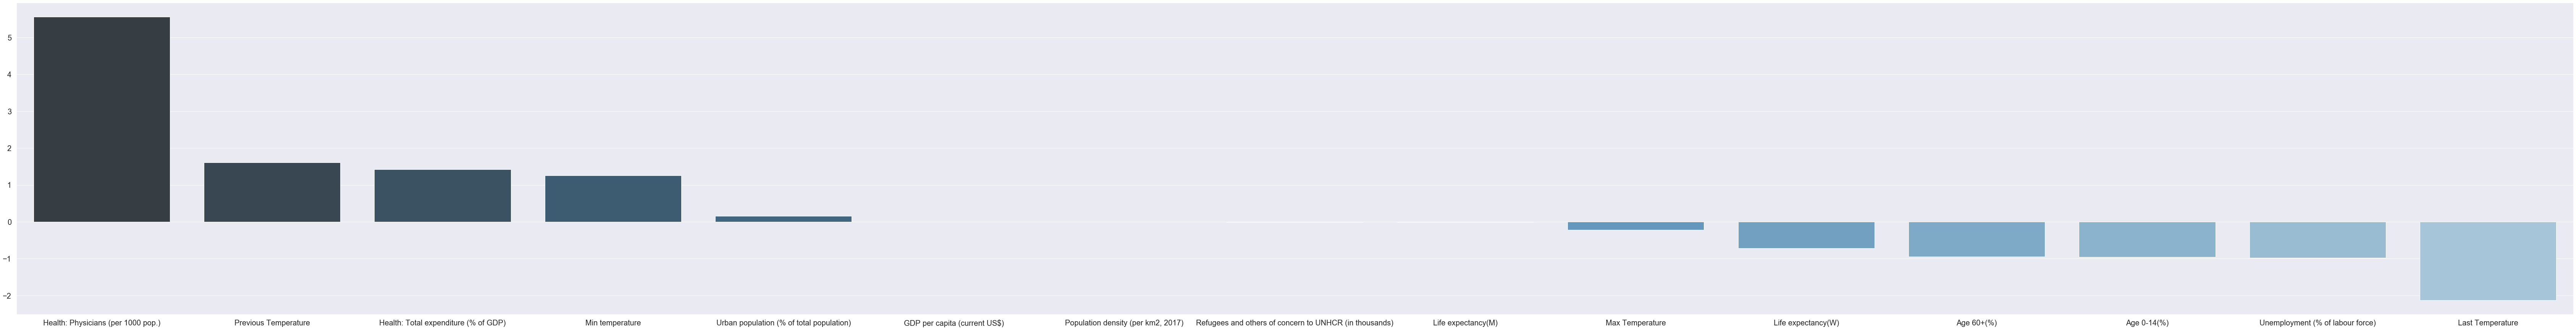

In [536]:
rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 20, 'ytick.labelsize': 20}
sns.set(rc=rc)
#coef.columns=colnames

coef = coef
coef=coef.sort_values(by=0, ascending=False, axis=1)
plt.figure(figsize=(120, 15))


ax = sns.barplot(data=coef,palette="Blues_d")
plt.savefig("plots/Corona_confirmed.png")

In [222]:
XX2_data.shape

(17, 15)

In [223]:
XX2_labels.shape[0]

17